In [32]:
!pip install --quiet wbgapi 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import wbgapi as wb

In [38]:
import requests

# replace with your Github username, repository name, and file path
username = "yohanesmiracle"
repo_name = "World_Bank_Data_projet_Yohanes-sourcefiles"
file_path = "API_TGO_DS2_fr_csv_v2_6014417.csv"

# make a GET request to the Github API
response = requests.get(f"https://api.github.com/repos/{username}/{repo_name}/contents/{file_path}")

# get the content of the file from the response
content = response.json()["content"]


# decode the base64-encoded content
import base64
decoded_content = base64.b64decode(content)
print(decoded_content)

b'"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022",\r\n"Togo","TGO","Internally displaced persons, total displaced by conflict and violence (number of people)","VC.IDP.TOCV","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","10000","10000","10000","10000","10000","10000","3000","1500","","","","","","2300",\r\n"Togo","TGO","Voice and Accountability: Standard Error","VA.STD.ERR","","","","","","","","","","","","","","","","","","","","","","",

## c'est ici que je mets les indicateurs que je pense que je vais utiliser

1. Analyse de Corrélation entre Indicateurs:

PIB par habitant. NY.GDP.PCAP.PP.KD

Taux d’alphabétisation, total des adultes (% des personnes âgées de 15 ans et plus). SE.ADT.LITR.ZS
Taux d’alphabétisation des jeunes hommes (% d’hommes âgés de 15 à 24 ans). SE.ADT.1524.LT.MA.ZS
Taux d’alphabétisation des femmes adultes (% de femmes âgées de 15 ans et plus). SE.ADT.LITR.FE.ZS
Taux d’alphabétisation des jeunes femmes (% de femmes âgées de 15 à 24 ans). SE.ADT.1524.LT.FE.ZS
Taux d’alphabétisation des jeunes (% des jeunes âgés de 15 à 24 ans). SE.ADT.1524.LT.ZS
Taux d’alphabétisation des hommes adultes (% d’hommes âgés de 15 ans et plus). SE.ADT.LITR.MA.ZS
Taux de mortalité infantile, moins de 5 ans (pour 1 000). SH.DYN.MORT
Taux de mortalité infantile (pour 1 000 naissances vivantes). SP.DYN.IMRT.IN
Taux de mortalité infantile, garçons (pour 1 000 naissances vivantes). SP.DYN.IMRT.MA.IN
Taux de mortalité infantile, filles (pour 1 000 naissances vivantes). SP.DYN.IMRT.FE.IN
Taux de mortalité infantile, moins de 5 ans, filles (pour 1000 naissances vivantes). SH.DYN.MORT.FE
Taux de mortalité infantile, moins de 5 ans, garçons (pour 1 000). SH.DYN.MORT.MA
Taux de mortalité néonatale (pour 1 000 naissances vivantes). SH.DYN.NMRT

Espérance de vie à la naissance, total (années). SP.DYN.LE00.IN
Espérance de vie à la naissance, femmes (années). SP.DYN.LE00.FE.IN
Espérance de vie à la naissance, hommes (années). SP.DYN.LE00.MA.IN

Chercheurs en recherche et développement (pour un million de personnes). SP.POP.SCIE.RD.P6
Dépenses en recherche et développement (% du PIB). GB.XPD.RSDV.GD.ZS


Ressources renouvelables d’eau douce intérieures, total (milliards de mètres cubes). ER.H2O.INTR.K3
Investissements dans l’eau et l’assainissement avec une participation privée ($ US courants). IE.PPI.WATR.CD
Retraits annuels d’eau douce, total (% des ressources internes). ER.H2O.FWTL.ZS
Retraits annuels d’eau douce pour usage domestique (% des retraits totaux d’eau douce). ER.H2O.FWDM.ZS
Retraits annuels d’eau douce, total (milliards de mètres cubes). ER.H2O.FWTL.K3
Retraits annuels d’eau douce pour l’agriculture (% des retraits totaux d’eau douce). ER.H2O.FWAG.ZS




---


<img decoding="async" src="https://salonimmigration.com/wp-content/uploads/2021/07/Universite_Teluq_Logo_255x158-1.png" alt="Logo Universite TELUQ" width="255" height="158" class="size-full wp-image-1922 alignleft" />



---




# c'est ici que tout mon code commence



In [2]:
import wbgapi as wb
import requests
import plotly.express as px
# wb.source.info()
wb.region.info()
wb.region.members('AFR')
wb.series.metadata.get('NY.GDP.PCAP.PP.KD') 
help(wb.economy.DataFrame())

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 | 

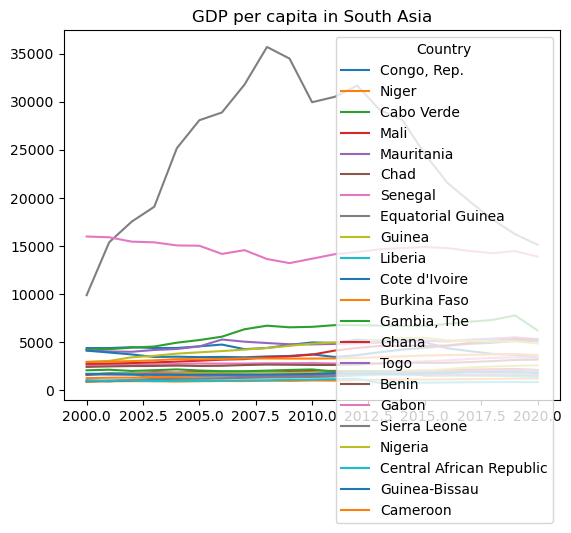

In [2]:
#Basic chart of income growth for countries in Africa region
wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = wb.region.members('AFW'), 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='GDP per capita in Africa');

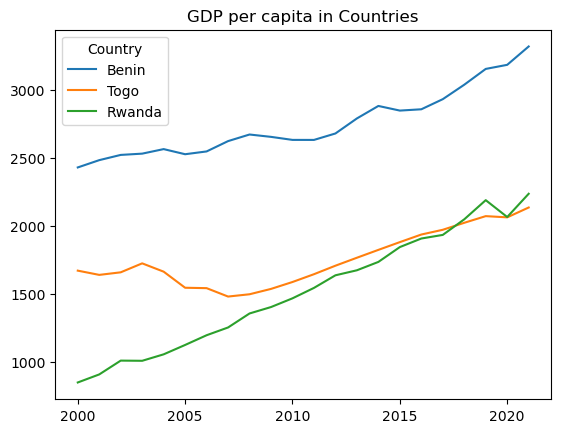

In [3]:

# print(list(wb.region.members('AFR')).index('TGO'))
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO', "BEN", "RWA"):
        countries.append(country)
countries = set(countries)
wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = countries, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='GDP per capita in Countries');

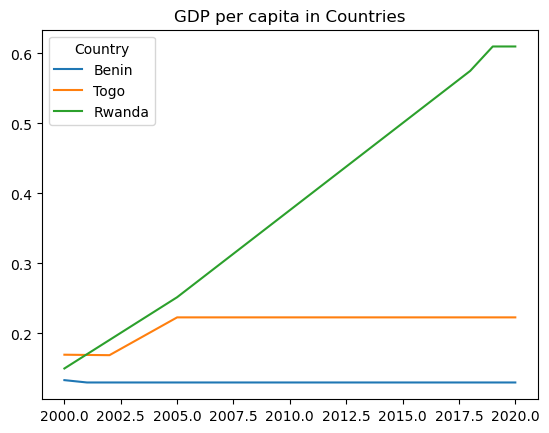

In [4]:


# print(list(wb.region.members('AFR')).index('TGO'))
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO', "BEN", "RWA"):
        countries.append(country)
countries = set(countries)
wb.data.DataFrame('ER.H2O.FWTL.K3', 
                    economy = countries, 
                    time = range(2000, 2022), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='GDP per capita in Countries');

In [5]:

# print(list(wb.region.members('AFR')).index('TGO'))
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO', "BEN", "RWA"):
        countries.append(country)
countries = set(countries)

# population for African countries, every other year
wb.data.DataFrame('SH.DYN.MORT', countries, range(2010, 2022, 2))

YR2010  YR2012  YR2014  YR2016  YR2018  YR2020
economy                                                
BEN       109.1   104.6   100.1    95.6    91.1    86.0
RWA        63.8    55.2    49.8    46.1    43.4    40.7
TGO        89.1    83.7    78.5    73.5    68.8    64.6

In [6]:
# Most recent CO2 emissions per capita for each country and merge its income group
wb.data.DataFrame('SP.DYN.LE00.IN',countries, mrnev=1, labels = True).join(wb.economy.DataFrame()['incomeLevel'])

Country  SP.DYN.LE00.IN incomeLevel
economy                                    
RWA      Rwanda          66.072         LIC
TGO        Togo          61.619         LIC
BEN       Benin          59.821         LMC

In [7]:
# Top 10 emitters per capita
wb.data.DataFrame('NY.GDP.PCAP.PP.KD',countries, mrnev=1,labels=True).sort_values('Country',ascending=True).head(10)

Country  NY.GDP.PCAP.PP.KD
economy                           
BEN       Benin        3435.171827
RWA      Rwanda        2364.938826
TGO        Togo        2208.688463

In [8]:
# Import GDP per capita (PPP Constant international $)
GDPpc_long = wb.data.DataFrame(['NY.GDP.PCAP.PP.KD', 'ER.H2O.FWTL.K3'], countries,
                                time=range(2000, 2021),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                                columns='series').sort_values('Country',ascending=True).reset_index()
GDPpc_long

economy    time Country  Time  ER.H2O.FWTL.K3  NY.GDP.PCAP.PP.KD
0      BEN  YR2020   Benin  2020        0.130000        3186.486294
1      BEN  YR2000   Benin  2000        0.133348        2431.445652
2      BEN  YR2002   Benin  2002        0.130000        2523.609973
3      BEN  YR2003   Benin  2003        0.130000        2532.998428
4      BEN  YR2004   Benin  2004        0.130000        2566.345657
..     ...     ...     ...   ...             ...                ...
58     TGO  YR2004    Togo  2004        0.205000        1664.481078
59     TGO  YR2003    Togo  2003        0.187000        1725.650257
60     TGO  YR2002    Togo  2002        0.169000        1659.683762
61     TGO  YR2001    Togo  2001        0.169333        1640.800162
62     TGO  YR2010    Togo  2010        0.223000        1588.398241

[63 rows x 6 columns]

In [9]:
# Rearrange data in wide form and drop countries for which data for all years are not available
GDPpc_wide = pd.pivot_table(GDPpc_long, 
                            values='SE.ADT.LITR.ZS', 
                            index = 'economy', columns='time').dropna()
GDPpc_wide

NameError: name 'pd' is not defined

In [10]:
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO', "BEN", "RWA"):
        countries.append(country)
countries = set(countries)

# population for African countries, every other year
wb.data.DataFrame('SE.ADT.LITR.ZS', countries, range(2010, 2020, 2))

YR2010     YR2012     YR2014  YR2016     YR2018
economy                                                    
BEN            NaN  32.948818        NaN     NaN        NaN
RWA      65.852272        NaN  70.804131     NaN  73.215591
TGO            NaN        NaN        NaN     NaN        NaN

In [11]:
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO', "BEN", "RWA"):
        countries.append(country)
countries = set(countries)

# population for African countries, every other year
wb.data.DataFrame('SH.DYN.MORT', countries, range(2010, 2020, 2))

YR2010  YR2012  YR2014  YR2016  YR2018
economy                                        
BEN       109.1   104.6   100.1    95.6    91.1
RWA        63.8    55.2    49.8    46.1    43.4
TGO        89.1    83.7    78.5    73.5    68.8

In [12]:
ren = wb.data.DataFrame('EG.ELC.RNEW.ZS', countries,
                      time=range(2000,2016,5))
ren

YR2000     YR2005     YR2010     YR2015
economy                                            
BEN       2.380952   0.934579   0.869565   5.555556
RWA      96.460177  55.772496  39.950196  56.887828
TGO      57.142857  40.211640  54.189944  75.308642

In [13]:
regionalIndentifiers = wb.economy.DataFrame(skipAggs=True).reset_index()
regionalIndentifiers

id          name  aggregate  longitude  latitude region adminregion  \
0    ABW         Aruba      False   -70.0167  12.51670    LCN               
1    AFG   Afghanistan      False    69.1761  34.52280    SAS         SAS   
2    AGO        Angola      False    13.2420  -8.81155    SSF         SSA   
3    ALB       Albania      False    19.8172  41.33170    ECS         ECA   
4    AND       Andorra      False     1.5218  42.50750    ECS               
..   ...           ...        ...        ...       ...    ...         ...   
212  XKX        Kosovo      False    20.9260  42.56500    ECS         ECA   
213  YEM   Yemen, Rep.      False    44.2075  15.35200    MEA         MNA   
214  ZAF  South Africa      False    28.1871 -25.74600    SSF         SSA   
215  ZMB        Zambia      False    28.2937 -15.39820    SSF         SSA   
216  ZWE      Zimbabwe      False    31.0672 -17.83120    SSF         SSA   

    lendingType incomeLevel       capitalCity  
0           LNX         HIC        Oranjestad  
1           IDX         LIC             Kabul  
2           IBD         LMC            Luanda  
3           IBD         UMC            Tirane  
4           LNX         HIC  Andorra la Vella  
..          ...         ...               ...  
212         IDX         UMC          Pristina  
213         IDX         LIC            Sana'a  
214         IBD         UMC          Pretoria  
215         IDX         LMC            Lusaka  
216         IDB         LMC            Harare  

[217 rows x 10 columns]

## Merge datasets

In [128]:
# Merge regional intifiers with long-form panel data (merge one to many)
# GDPpc_longWITHri = pd.merge(GDPpc_long, regionalIndentifiers)
# GDPpc_longWITHri
#continuer à

## Visualize data

<Axes: xlabel='economy,series'>

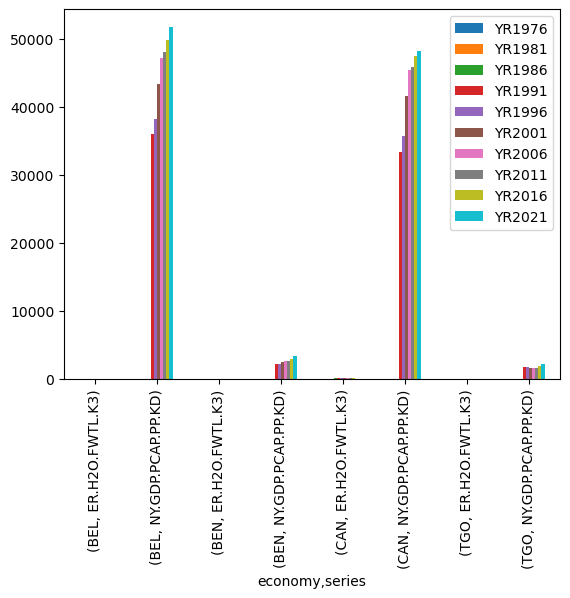

In [31]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD', 'ER.H2O.FWTL.K3'],
                     countries,
                      time=range(1976,2022,5)).plot.bar()

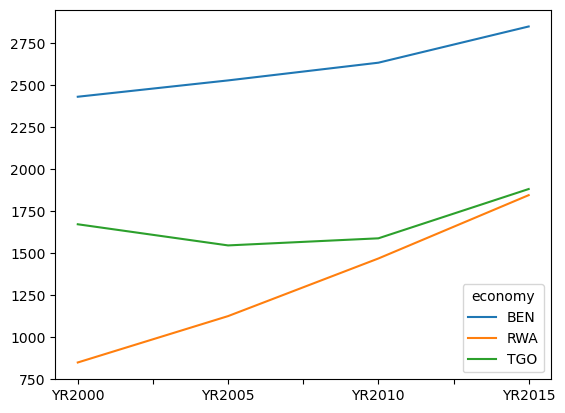

In [15]:
# Line plots
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'],
       countries,
       time=range(2000,2016,5)).T.plot();

         YR1960  YR1961  YR1962  YR1963  YR1964  YR1965  YR1966  YR1967  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1968  YR1969  ...    YR2013     YR2014     YR2015  YR2016  YR2017  \
economy                  ...                                                   
TGO         NaN     NaN  ...  81.72043  86.206897  75.308642     NaN     NaN   

         YR2018  YR2019  YR2020  YR2021  YR2022  
economy                                          
TGO         NaN     NaN     NaN     NaN     NaN  

[1 rows x 63 columns]


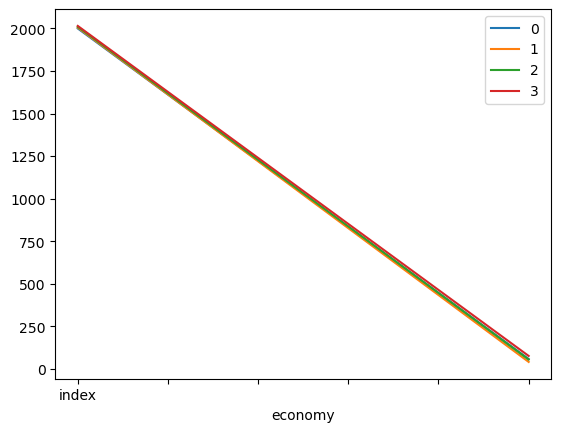

In [29]:
df8 = wb.data.DataFrame(['EG.ELC.RNEW.ZS'],
       ['TGO'],
       time=range(2000, 2016, 5), numericTimeKeys = True).T.reset_index()
print( wb.data.DataFrame(['EG.ELC.RNEW.ZS'],
       ['TGO']))
df8.T.plot();




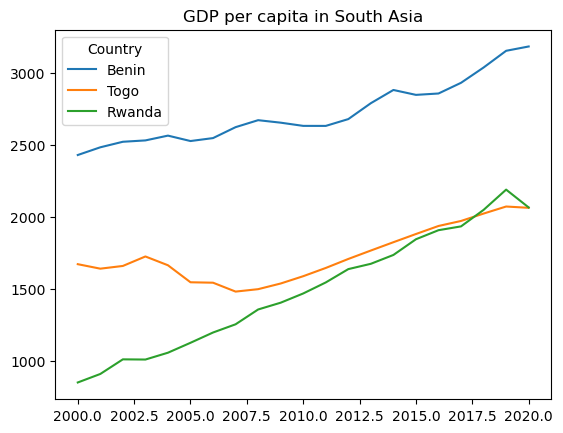

In [17]:
import matplotlib.pyplot as plt 
import random as random 
  
wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                  countries,
#                     economy = wb.region.members('SAS'), 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country').transpose().plot(title='GDP per capita in South Asia');

In [18]:
print(list(range(2000, 2016, 5)))

[2000, 2005, 2010, 2015]


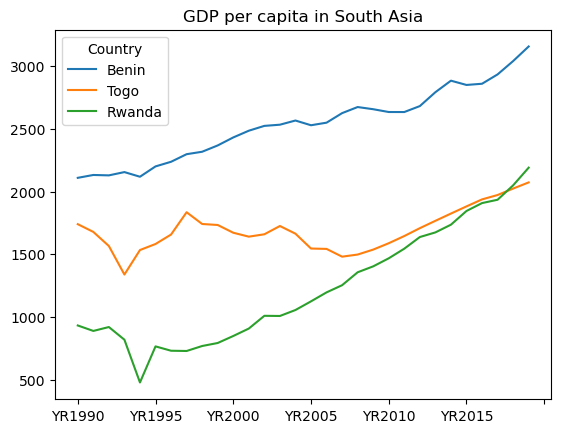

In [19]:
#Basic chart of income growth for countries in the South Asia region
wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                  countries,
#                     economy = wb.region.members('SAS'), 
                    time = range(1990, 2020, 1), numericTimeKeys = False,
                    labels = True).set_index('Country').transpose().plot(title='GDP per capita in South Asia');

In [20]:
df8 = wb.data.DataFrame('NY.GDP.PCAP.PP.KD',
       list(countries),
       time=range(2000, 2016, 5), numericTimeKeys = True).T.reset_index()
px.line(df8, 
        x= 'index', 
        y= list(countries),
        labels=dict(index = 'Year',
                    value = 'PIB',
                    variable = 'Country')
        )



In [21]:
# Import GDP per capita and secondary school enrollment 
df2017_2019 = wb.data.DataFrame(['NY.GDP.PCAP.PP.KD', 'SH.DYN.MORT'], countries,
                                time=range(2017, 2019),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                                columns='series').reset_index()
df2017_2019

economy    time Country  Time  NY.GDP.PCAP.PP.KD  SH.DYN.MORT
0     BEN  YR2018   Benin  2018        3040.167520         91.1
1     BEN  YR2017   Benin  2017        2933.837384         93.4
2     TGO  YR2018    Togo  2018        2024.089319         68.8
3     TGO  YR2017    Togo  2017        1972.697196         71.2
4     RWA  YR2018  Rwanda  2018        2049.693032         43.4
5     RWA  YR2017  Rwanda  2017        1934.972955         44.6

## Maps

In [28]:
px.choropleth(
    df2017_2019.query("Time == '2017'"),
    locations = "economy",
    color = "SH.DYN.MORT",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma,
    projection = "natural earth",
    labels = {"NY.GDP.PCAP.PP.KD": "GDP per capita"}
     )

In [23]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Africa' and country in ['Togo', 'Mali'] ")
# print(df)
# fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
# fig.show()


df = wb.data.DataFrame(['SP.POP.TOTL'], countries,
                                time=range(1990, 2022, 5),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                       
                                columns='series').reset_index()
print(df)
fig = px.line(df.sort_values('Time'),  x='SP.POP.TOTL', y='Time', color='Country',  text="time",  markers=True)

fig.update_traces(textposition="bottom right")
fig.show()



   economy    time Country  Time  SP.POP.TOTL
0      BEN  YR2020   Benin  2020   12643123.0
1      BEN  YR2015   Benin  2015   10932783.0
2      BEN  YR2010   Benin  2010    9445710.0
3      BEN  YR2005   Benin  2005    8149419.0
4      BEN  YR2000   Benin  2000    6998023.0
5      BEN  YR1995   Benin  1995    6046511.0
6      BEN  YR1990   Benin  1990    5133419.0
7      TGO  YR2020    Togo  2020    8442580.0
8      TGO  YR2015    Togo  2015    7473229.0
9      TGO  YR2010    Togo  2010    6571855.0
10     TGO  YR2005    Togo  2005    5711597.0
11     TGO  YR2000    Togo  2000    5008035.0
12     TGO  YR1995    Togo  1995    4279566.0
13     TGO  YR1990    Togo  1990    3875947.0
14     RWA  YR2020  Rwanda  2020   13146362.0
15     RWA  YR2015  Rwanda  2015   11642959.0
16     RWA  YR2010  Rwanda  2010   10309031.0
17     RWA  YR2005  Rwanda  2005    9026299.0
18     RWA  YR2000  Rwanda  2000    8109989.0
19     RWA  YR1995  Rwanda  1995    5686897.0
20     RWA  YR1990  Rwanda  1990  

In [24]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = wb.data.DataFrame(['SP.POP.TOTL', 'SH.DYN.MORT'], countries,
                                time=range(1990, 2022, 5),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                       
                                columns='series').reset_index()
print(df)

fig = px.pie(df, values='SP.POP.TOTL', names='Country')
# df = px.data.tips()
# print(df)


fig = px.pie(df, values='tip', names='day')
fig.show()

   economy    time Country  Time  SH.DYN.MORT  SP.POP.TOTL
0      BEN  YR2020   Benin  2020         86.0   12643123.0
1      BEN  YR2015   Benin  2015         97.9   10932783.0
2      BEN  YR2010   Benin  2010        109.1    9445710.0
3      BEN  YR2005   Benin  2005        121.6    8149419.0
4      BEN  YR2000   Benin  2000        136.8    6998023.0
5      BEN  YR1995   Benin  1995        153.3    6046511.0
6      BEN  YR1990   Benin  1990        172.7    5133419.0
7      TGO  YR2020    Togo  2020         64.6    8442580.0
8      TGO  YR2015    Togo  2015         75.9    7473229.0
9      TGO  YR2010    Togo  2010         89.1    6571855.0
10     TGO  YR2005    Togo  2005        103.2    5711597.0
11     TGO  YR2000    Togo  2000        120.0    5008035.0
12     TGO  YR1995    Togo  1995        136.4    4279566.0
13     TGO  YR1990    Togo  1990        147.5    3875947.0
14     RWA  YR2020  Rwanda  2020         40.7   13146362.0
15     RWA  YR2015  Rwanda  2015         47.7   11642959

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['economy', 'time', 'Country', 'Time', 'SH.DYN.MORT', 'SP.POP.TOTL'] but received: day

In [26]:
import requests
import json
import pandas as pd

indocator = ['NY.GDP.PCAP.PP.KD', 'SP.DYN.LE00.IN', 'GB.XPD.RSDV.GD.ZS']

url = f'http://api.worldbank.org/v2/country/%s/indicator/{indocator}?format=json'
countries = [ "TGO","CAN", "BEL", "BEN",]

print(countries[0])

data_togo_dict = {}
    
my_values = []
for country in countries:
    data = requests.get(url %country).json()
#     print(data[1])
    for d in data[1]:
        data_togo_dict['data_togo_1']= []
        data_togo_dict['data_togo_1'].append(d)
        
    print(json.dumps(data_togo_dict))
    break
    
    
    
#     try:
#         for d in data[1]:
#             my_values.append({
#                 'country':d['country']['value'],
#                 'date':d['date'],
#                 'value':d['value']
#             })
#     except Exception as err:
#         print(f'[ERROR] country ==> {country} error ==> {err}')

# pd.DataFrame(my_values).sort_values(['country', 'date'], ascending=True)


TGO


IndexError: list index out of range